# HW_05 by Andrew Lee

Import Data

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./dataset/datasets_applied_business_analytics - leadscoring.csv.csv')
# set the feature unit type to int
df[['num_employees', 'first_call_duration_mins', 'dm_familiarity', 'dm_perception','dm_awareness','existing_customer','company_age_months']] = \
df[['num_employees', 'first_call_duration_mins', 'dm_familiarity', 'dm_perception','dm_awareness','existing_customer','company_age_months']].astype(int)
df.fillna(0,inplace=True)
# remove the dollar sign
df['current_spend'] = [float(x[1:].replace(',', '')) for x in df['current_spend']]
df = df.set_index("organization_id")
df.head(3)


,data_category,purchased,num_employees,first_call_duration_mins,industry,dm_familiarity,dm_perception,dm_awareness,existing_customer,current_spend,company_age_months,trial
organization_id,,,,,,,,,,,,
952033787530997000,historical,1.0,20,22,CPG,1,2,1,1,4865.0,5,0
835870154298153000,historical,1.0,88,21,CPG,3,3,2,0,0.0,6,0
720374601071944000,historical,1.0,38,15,CPG,3,4,1,0,0.0,9,0


# Descriptive visualizations

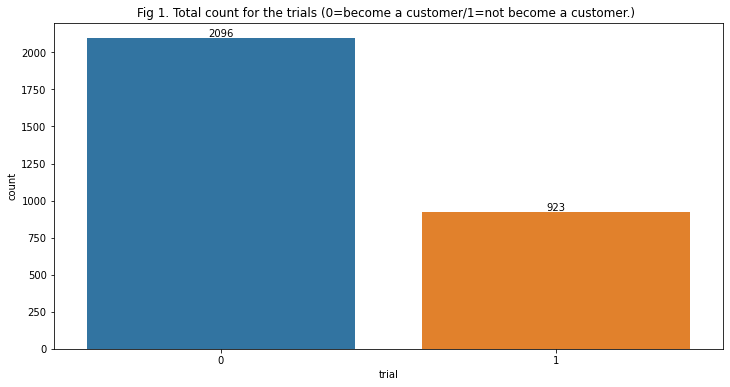

In [8]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='trial')
plt.title('Fig 1. Total count for the trials (0=become a customer/1=not become a customer) ')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

From Fig 1, it shows the dataset is not balance. The ratio between the become a customer and not become a customer is 2:1. This may affect the prediction model have higher chance to produce not become a customer as the result.

# Data analysis can be a valuable tool in lead scoring, which is the process of assigning a numeric value to a lead based on its likelihood of becoming a customer.

Our goal is trying to apply logistic regression with 2 features to predict the trial. The trial feature is the dependent variable (outcome variable). I filiter out the category and id type of variable and here are the possible indepentent variables: 
- num_employees 
- first_call_duration_mins 
- dm_familiarity 
- dm_perception  
- dm_awareness 
- existing_customer
- current_spend
- company_age_months  


First, I need to get all the possible combination with the independent features.

In [2]:
features = ['num_employees', 'first_call_duration_mins', 'dm_familiarity', 'dm_perception','dm_awareness','existing_customer','current_spend','company_age_months']
combinations = []
result_df =pd.DataFrame(columns=['combination', 'accuracy','Precision','Recall'])
for i in range(len(features)):
    for j in range(i+1, len(features)):
        combinations.append([features[i],features[j]])
for combination in combinations:
    X = df[combination]
    Y= df['trial'].astype('bool')
    model = LogisticRegression()
    model.fit(X, Y)
    # predict the class labels
    y_pred = model.predict(X)
    # calculate the confusion matrix
    cm = confusion_matrix(Y, y_pred)
    # create a DataFrame from the confusion matrix
    cm_df = pd.DataFrame(cm, index=['True_Negative', 'True_Positive'], columns=['Predicted_Negative', 'Predicted_Positive'])
    # print the confusion matrix
    total = y_pred.size
    accuracy = (cm_df['Predicted_Negative']['True_Negative']+cm_df['Predicted_Positive']['True_Positive'])/total
    # avoid 0 divsion 
    if ((cm_df['Predicted_Positive']['True_Negative']+cm_df['Predicted_Positive']['True_Positive'])==0):
        Precision = 0
    else:
        Precision = cm_df['Predicted_Positive']['True_Positive']/(cm_df['Predicted_Positive']['True_Negative']+cm_df['Predicted_Positive']['True_Positive'])
    Recall = cm_df['Predicted_Positive']['True_Positive']/(cm_df['Predicted_Negative']['True_Positive']+cm_df['Predicted_Positive']['True_Positive'])
    # create dataframe for result 
    temp_dict = {'combination':[' & '.join(combination)], "accuracy":[accuracy],"Precision":[Precision],"Recall":[Recall]}
    new_data = pd.DataFrame(temp_dict)
    result_df = pd.concat([result_df, new_data], ignore_index = True)
result_df.head(5)


,combination,accuracy,Precision,Recall
0,num_employees & first_call_duration_mins,0.998013,0.998912,0.994583
1,num_employees & dm_familiarity,0.997681,1.0,0.992416
2,num_employees & dm_perception,0.997681,1.0,0.992416
3,num_employees & dm_awareness,0.997681,1.0,0.992416
4,num_employees & existing_customer,0.997681,1.0,0.992416


In [69]:
print("Top 5 combination with largest accuracy table ")
result_df.sort_values('accuracy', ascending=False).head(5)

Top 5 combination with largest accuracy table 


,combination,accuracy,Precision,Recall
0,num_employees & first_call_duration_mins,0.998013,0.998912,0.994583
5,num_employees & current_spend,0.998013,0.993541,1.0
2,num_employees & dm_perception,0.997681,1.0,0.992416
3,num_employees & dm_awareness,0.997681,1.0,0.992416
4,num_employees & existing_customer,0.997681,1.0,0.992416


From the top 5 combinations with the largest accuracy table, we find that combinations(num_employees & first_call_duration_mins)and (num_employees & current_spend) both have 0.998 accuracy. Combination (num_employees & first_call_duration_mins) have 0.998 Precision and 0.994 Recall. Combination (num_employees & current_spend) has 0.993541 Precision and 1 Recall. We could say both combinations have the best prediction for the dataset.

In [14]:
print("Top 5 combination with largest Precision table ")
result_df.sort_values('Precision', ascending=False).head(6)

Top 5 combination with largest Precision table 


,combination,accuracy,Precision,Recall
2,num_employees & dm_perception,0.997681,1.0,0.992416
3,num_employees & dm_awareness,0.997681,1.0,0.992416
4,num_employees & existing_customer,0.997681,1.0,0.992416
6,num_employees & company_age_months,0.997681,1.0,0.992416
1,num_employees & dm_familiarity,0.997681,1.0,0.992416
0,num_employees & first_call_duration_mins,0.998013,0.998912,0.994583


From the top 5 combinations with the largest Precision table, we find there are 5 combinations that have 1 precision : 

(num_employees & dm_perception) 
(num_employees & dm_awareness) 
(num_employees & existing_customer) 
(num_employees & company_age_months) 
(num_employees & dm_familiarity)

Using this five combinations feautre to the model will provide a lower chance to predict fake positive result (predict the person will be the customer but the fact is not)

In [15]:
print("Top 5 combination with Recall accuracy table ")
result_df.sort_values('Recall', ascending=False).head(5)

Top 5 combination with Recall accuracy table 


,combination,accuracy,Precision,Recall
5,num_employees & current_spend,0.998013,0.993541,1.0
0,num_employees & first_call_duration_mins,0.998013,0.998912,0.994583
2,num_employees & dm_perception,0.997681,1.0,0.992416
3,num_employees & dm_awareness,0.997681,1.0,0.992416
4,num_employees & existing_customer,0.997681,1.0,0.992416


From the top 5 combinations with the largest Precision table, we find there are 1 combinations that have 1 precision : num_employees & current_spend	

Using this combinations feautre to the model will provide a lower chance to predict fake negative result (predict the person will not be the customer but the fact is person will be the customer)

### In conclusion, If we seek for overall acuracy, using the features combination (num_employees & first_call_duration_mins) or  (num_employees & current_spend) provide the best predication result with the dataset. However, if we seek for the saving empolyee effort and company resource, using the feautures combination (num_employees & dm_perception) ,(num_employees & dm_awareness) ,(num_employees & existing_customer) ,(num_employees & company_age_months) ,(num_employees & dm_familiarity) will the the best predication result with the dataset. If we seek for the maximum the probality to look potential customer, using the feautures combination (num_employees & current_spend) will the the best predication result with the dataset. 